# Wine Quality PCA

Cargamos los datos

In [1]:
import pandas as pd
ds_path = "data/winequality-red.csv"
df = pd.read_csv(ds_path)


In [2]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


Exploramos los datos

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Se observan tipos de datos que pueden ser ajustados

In [4]:
from utils.eda import convert_bolean_columns
df["quality"] = df["quality"].astype("category")


Observamos los valores unicos de las variables categóricas

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         1599 non-null   float64 
 1   volatile acidity      1599 non-null   float64 
 2   citric acid           1599 non-null   float64 
 3   residual sugar        1599 non-null   float64 
 4   chlorides             1599 non-null   float64 
 5   free sulfur dioxide   1599 non-null   float64 
 6   total sulfur dioxide  1599 non-null   float64 
 7   density               1599 non-null   float64 
 8   pH                    1599 non-null   float64 
 9   sulphates             1599 non-null   float64 
 10  alcohol               1599 non-null   float64 
 11  quality               1599 non-null   category
dtypes: category(1), float64(11)
memory usage: 139.3 KB


Continuamos con la exploración de los datos

Visualizamos la cabecera, luego las últimas entradas

In [6]:
df.tail(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1589,6.6,0.725,0.20,7.8,0.073,29.0,79.0,0.99770,3.29,0.54,9.2,5
1590,6.3,0.550,0.15,1.8,0.077,26.0,35.0,0.99314,3.32,0.82,11.6,6
1591,5.4,0.740,0.09,1.7,0.089,16.0,26.0,0.99402,3.67,0.56,11.6,6
1592,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


Verificamos los valores descriptivos

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [8]:
df.describe(include='category').T

,count,unique,top,freq
quality,1599,6,5,681


## Identificación de valores nulos y outliers

In [9]:
duplicated = df.duplicated().sum()
print(f"Registros duplicados en df: {duplicated}")

Registros duplicados en df: 240


Se observan varias entradas duplicadas

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
duplicated = df.duplicated().sum()
print(f"Registros duplicados en df: {duplicated}")

Registros duplicados en df: 0


Ahora valores nulos

In [12]:
from utils.extra import get_nulll_data_info
get_nulll_data_info(df)

,datos sin NAs en q,Na en q,Na en %
fixed acidity,1359,0,0.0
volatile acidity,1359,0,0.0
citric acid,1359,0,0.0
residual sugar,1359,0,0.0
chlorides,1359,0,0.0
free sulfur dioxide,1359,0,0.0
total sulfur dioxide,1359,0,0.0
density,1359,0,0.0
pH,1359,0,0.0
sulphates,1359,0,0.0


No se observan valores nulos

Ahora verificamos los outliers

In [13]:
from utils.extra import get_outliers_data
get_outliers_data(df)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
N° Outliers,41.000000,19.000000,1.000000,126.000000,87.000000,26.000000,45.000000,35.000000,28.000000,55.000000,12.000000
% Outliers,3.016924,1.398087,0.073584,9.271523,6.401766,1.913171,3.311258,2.575423,2.060338,4.047093,0.883002
Lim. mix,3.950000,0.015000,-0.420000,0.850000,0.038500,-14.000000,-39.500000,0.992270,2.925000,0.280000,7.100000
Lim. max,12.350000,1.015000,0.940000,3.650000,0.122500,42.000000,124.500000,1.001150,3.685000,1.000000,13.500000


Visualizamos las gráficas de cajas de nuestras columnas

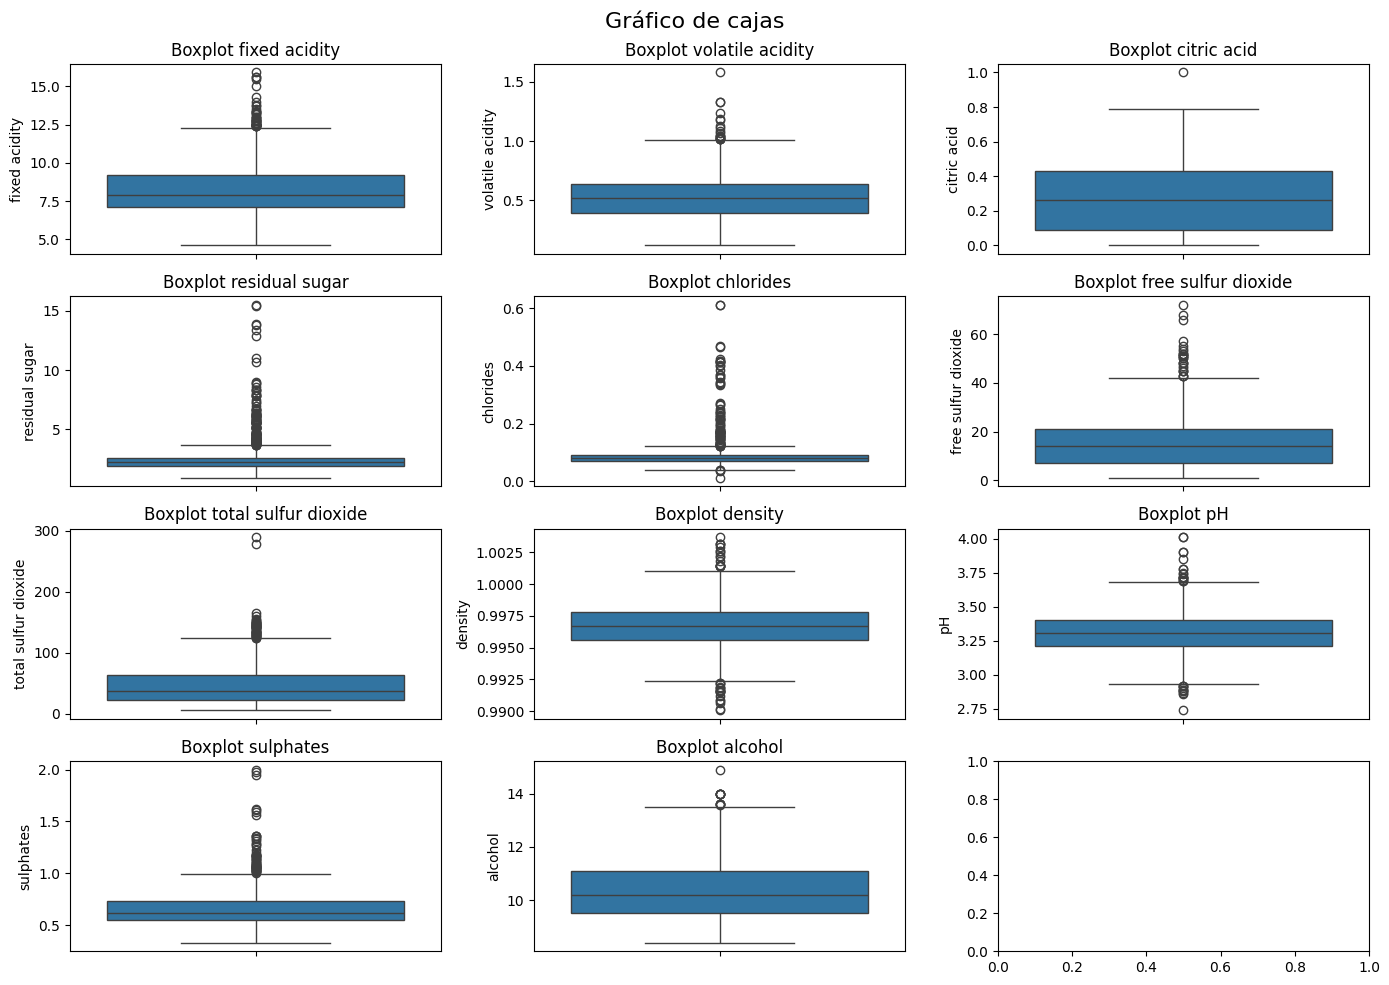

In [14]:
from utils.extra import graph_boxplot, get_numeric_columns
graph_boxplot(df, columns=get_numeric_columns(df))

Observamos outliers en varias columnas

Ahora veremos las caracteristicas descriptivas de las variables númericas

In [15]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


In [16]:
from utils.extra import get_descriptive_statistics
get_descriptive_statistics(df)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065
median,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000
variation_coefficient,0.209009,0.345683,0.718006,0.535909,0.560314,0.657338,0.713470,0.001875,0.046842,0.259095,0.103722


Ahora visualizaremos los histogramas de las diferentes columnas numéricas para entender mejor la distribución

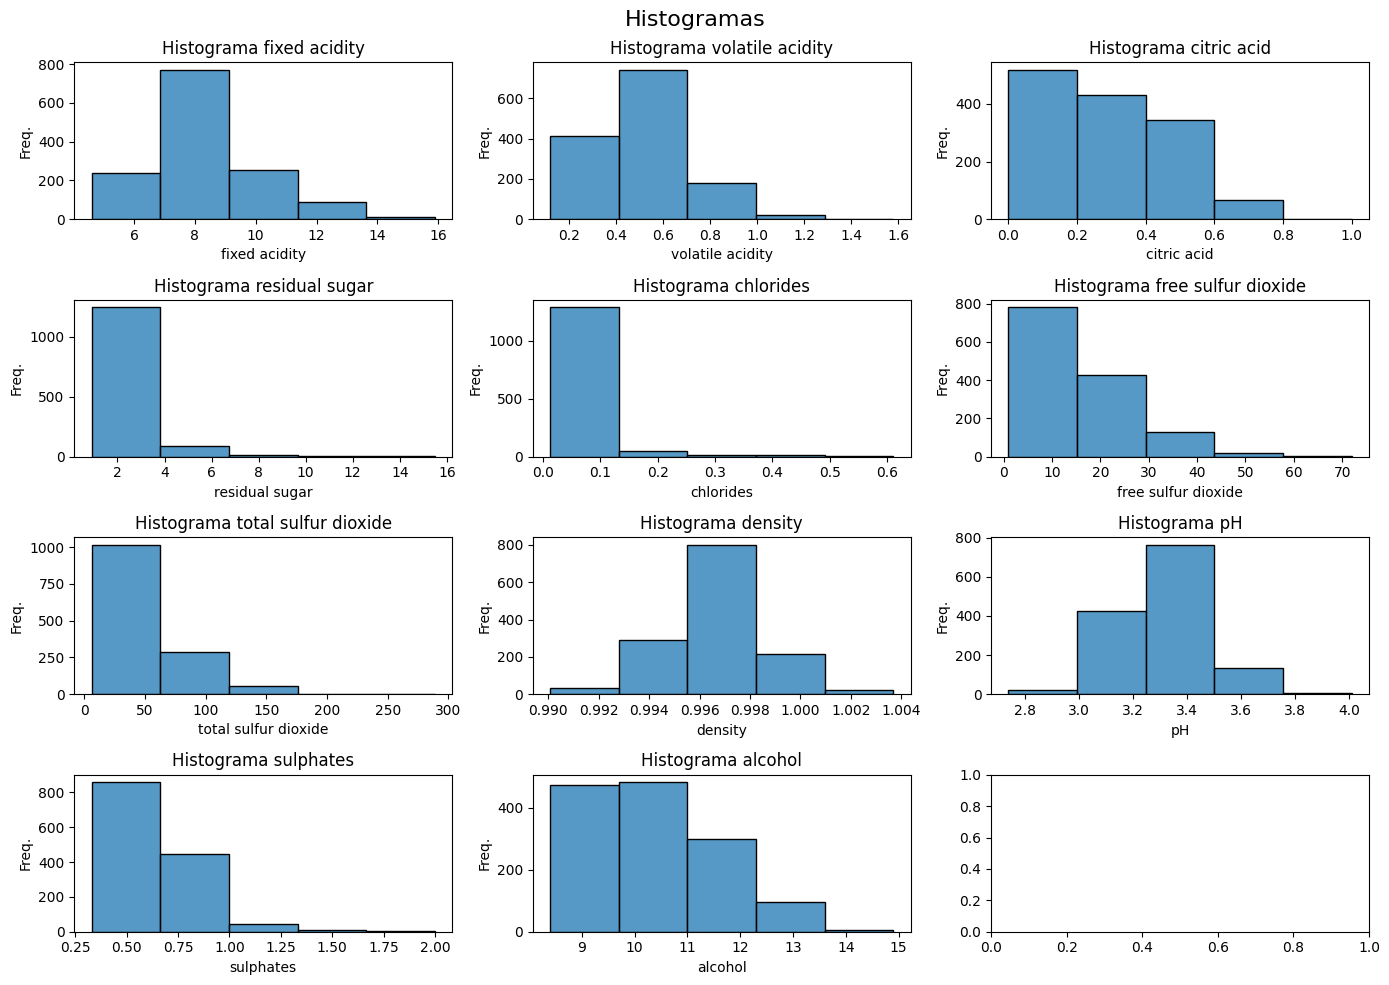

In [17]:
from utils.extra import graph_histogram
graph_histogram(df, get_numeric_columns(df))

No se observa nada fuera de lo normal en las distribuciones

Veremos las correlaciones entre las caracteristicas

In [18]:
from utils.extra import get_numeric_columns
numeric_columns = get_numeric_columns(df)
corr_matrix = df[numeric_columns].corr(method="pearson")
spearmann = df[numeric_columns].corr(method="spearman")
kendall = df[numeric_columns].corr(method="kendall")
corr_matrix

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.255124,0.667437,0.111025,0.085886,-0.140580,-0.103777,0.670195,-0.686685,0.190269,-0.061596
volatile acidity,-0.255124,1.000000,-0.551248,-0.002449,0.055154,-0.020945,0.071701,0.023943,0.247111,-0.256948,-0.197812
citric acid,0.667437,-0.551248,1.000000,0.143892,0.210195,-0.048004,0.047358,0.357962,-0.550310,0.326062,0.105108
residual sugar,0.111025,-0.002449,0.143892,1.000000,0.026656,0.160527,0.201038,0.324522,-0.083143,-0.011837,0.063281
chlorides,0.085886,0.055154,0.210195,0.026656,1.000000,0.000749,0.045773,0.193592,-0.270893,0.394557,-0.223824
free sulfur dioxide,-0.140580,-0.020945,-0.048004,0.160527,0.000749,1.000000,0.667246,-0.018071,0.056631,0.054126,-0.080125
total sulfur dioxide,-0.103777,0.071701,0.047358,0.201038,0.045773,0.667246,1.000000,0.078141,-0.079257,0.035291,-0.217829
density,0.670195,0.023943,0.357962,0.324522,0.193592,-0.018071,0.078141,1.000000,-0.355617,0.146036,-0.504995
pH,-0.686685,0.247111,-0.550310,-0.083143,-0.270893,0.056631,-0.079257,-0.355617,1.000000,-0.214134,0.213418
sulphates,0.190269,-0.256948,0.326062,-0.011837,0.394557,0.054126,0.035291,0.146036,-0.214134,1.000000,0.091621


Ahora graficamos el mapa de calor de las correlaciones

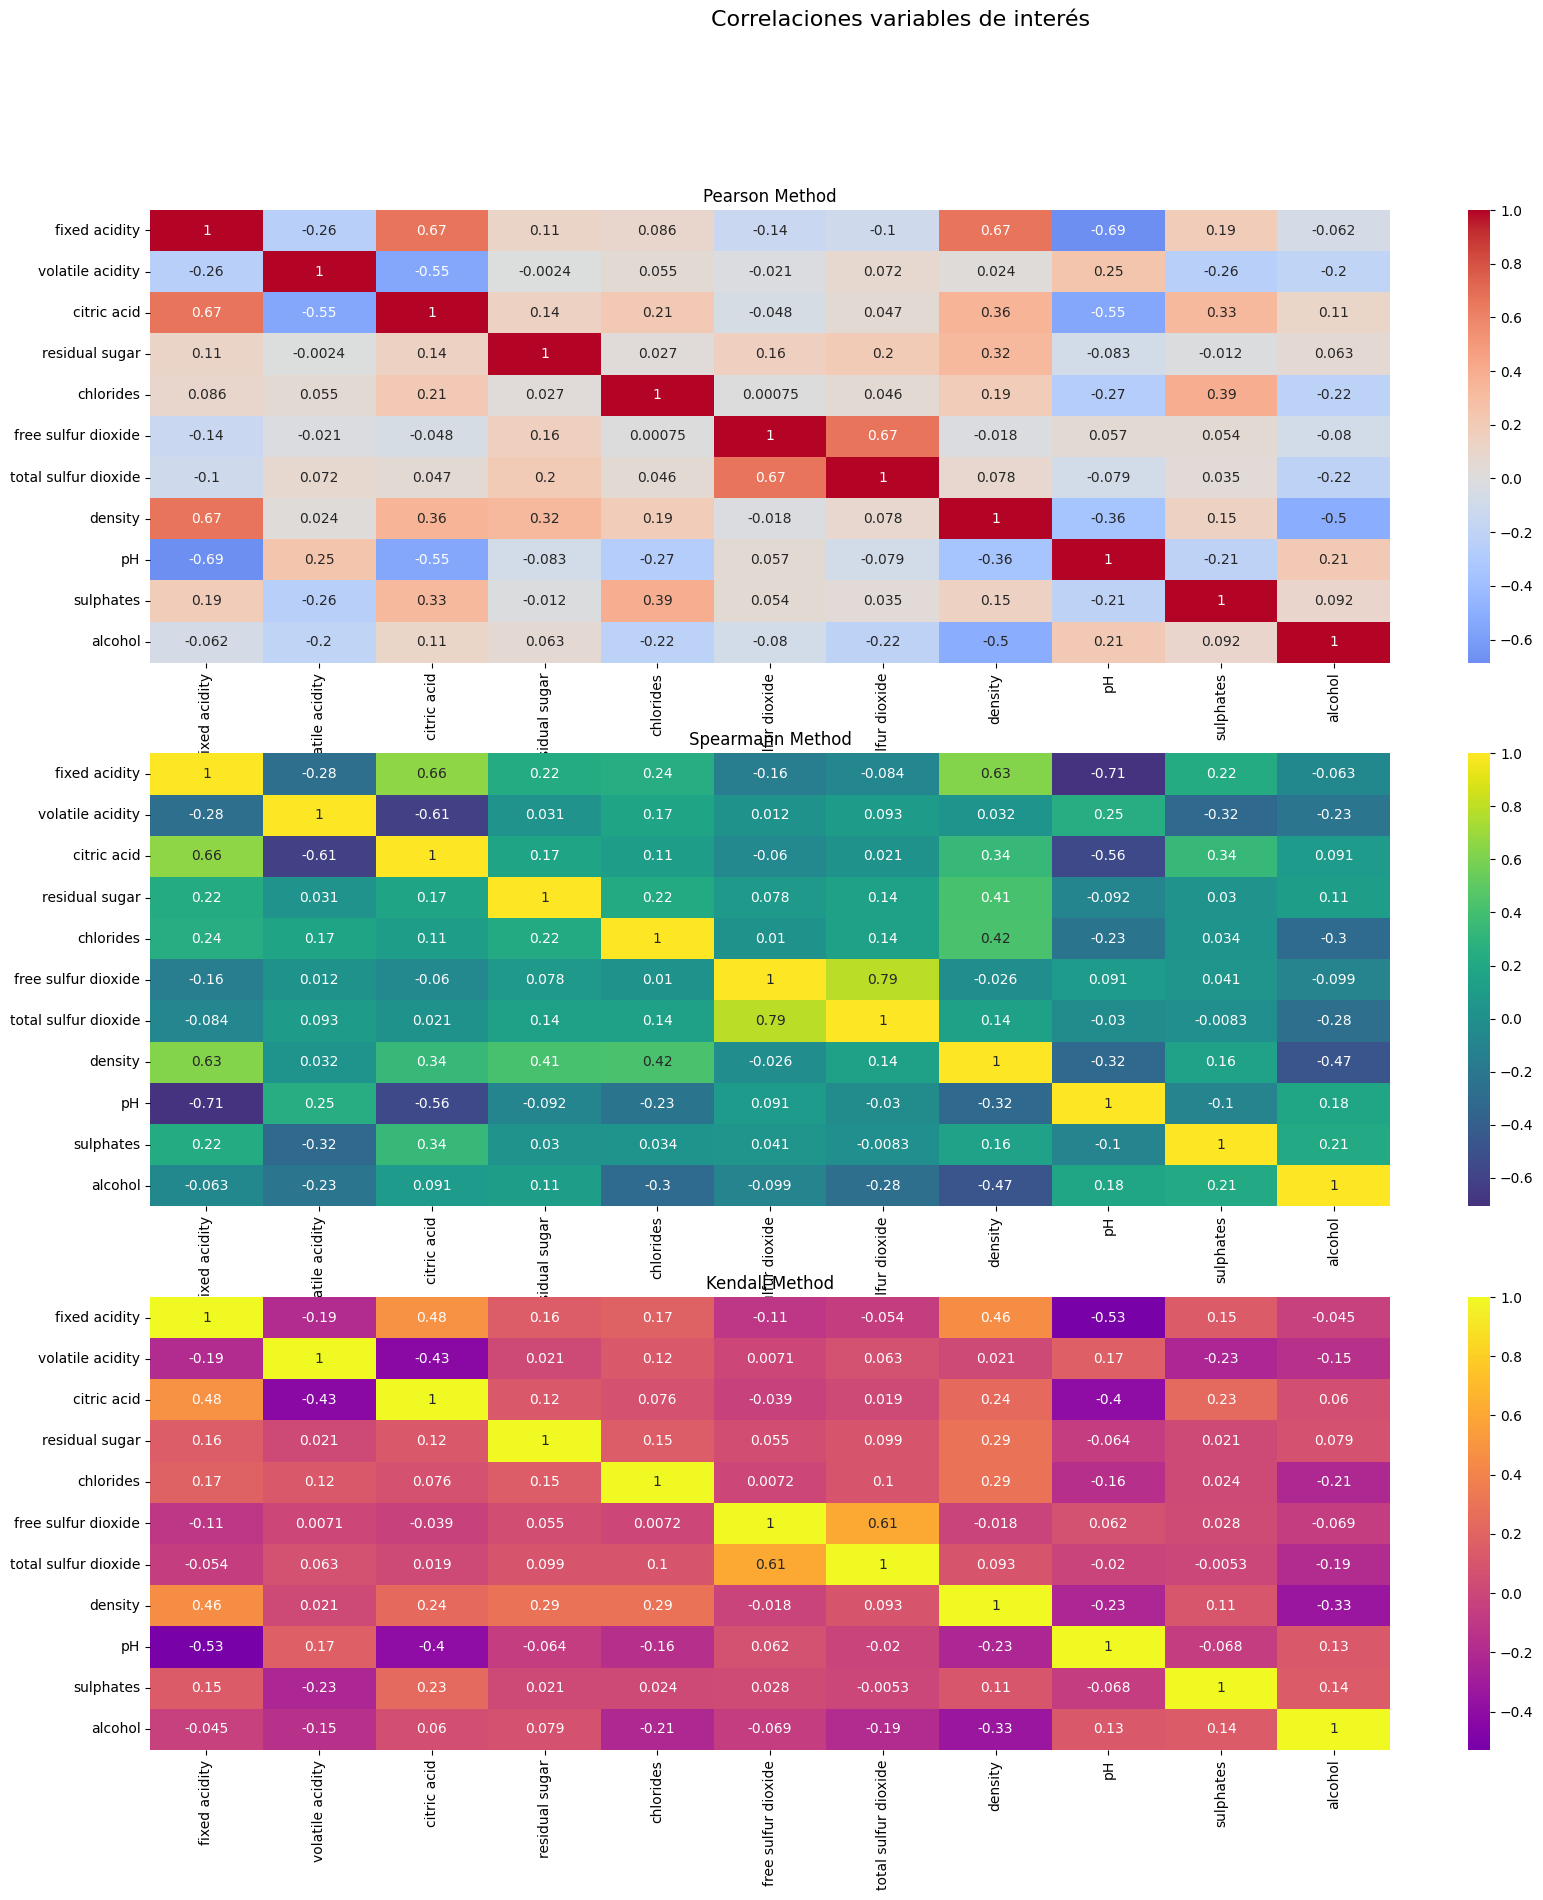

In [19]:
from utils.extra import graph_correlations
graph_correlations(corr_matrix, spearmann, kendall, "Correlaciones variables de interés", figsize= (20,20))

Ahora observaremos la dispersión entre las variables

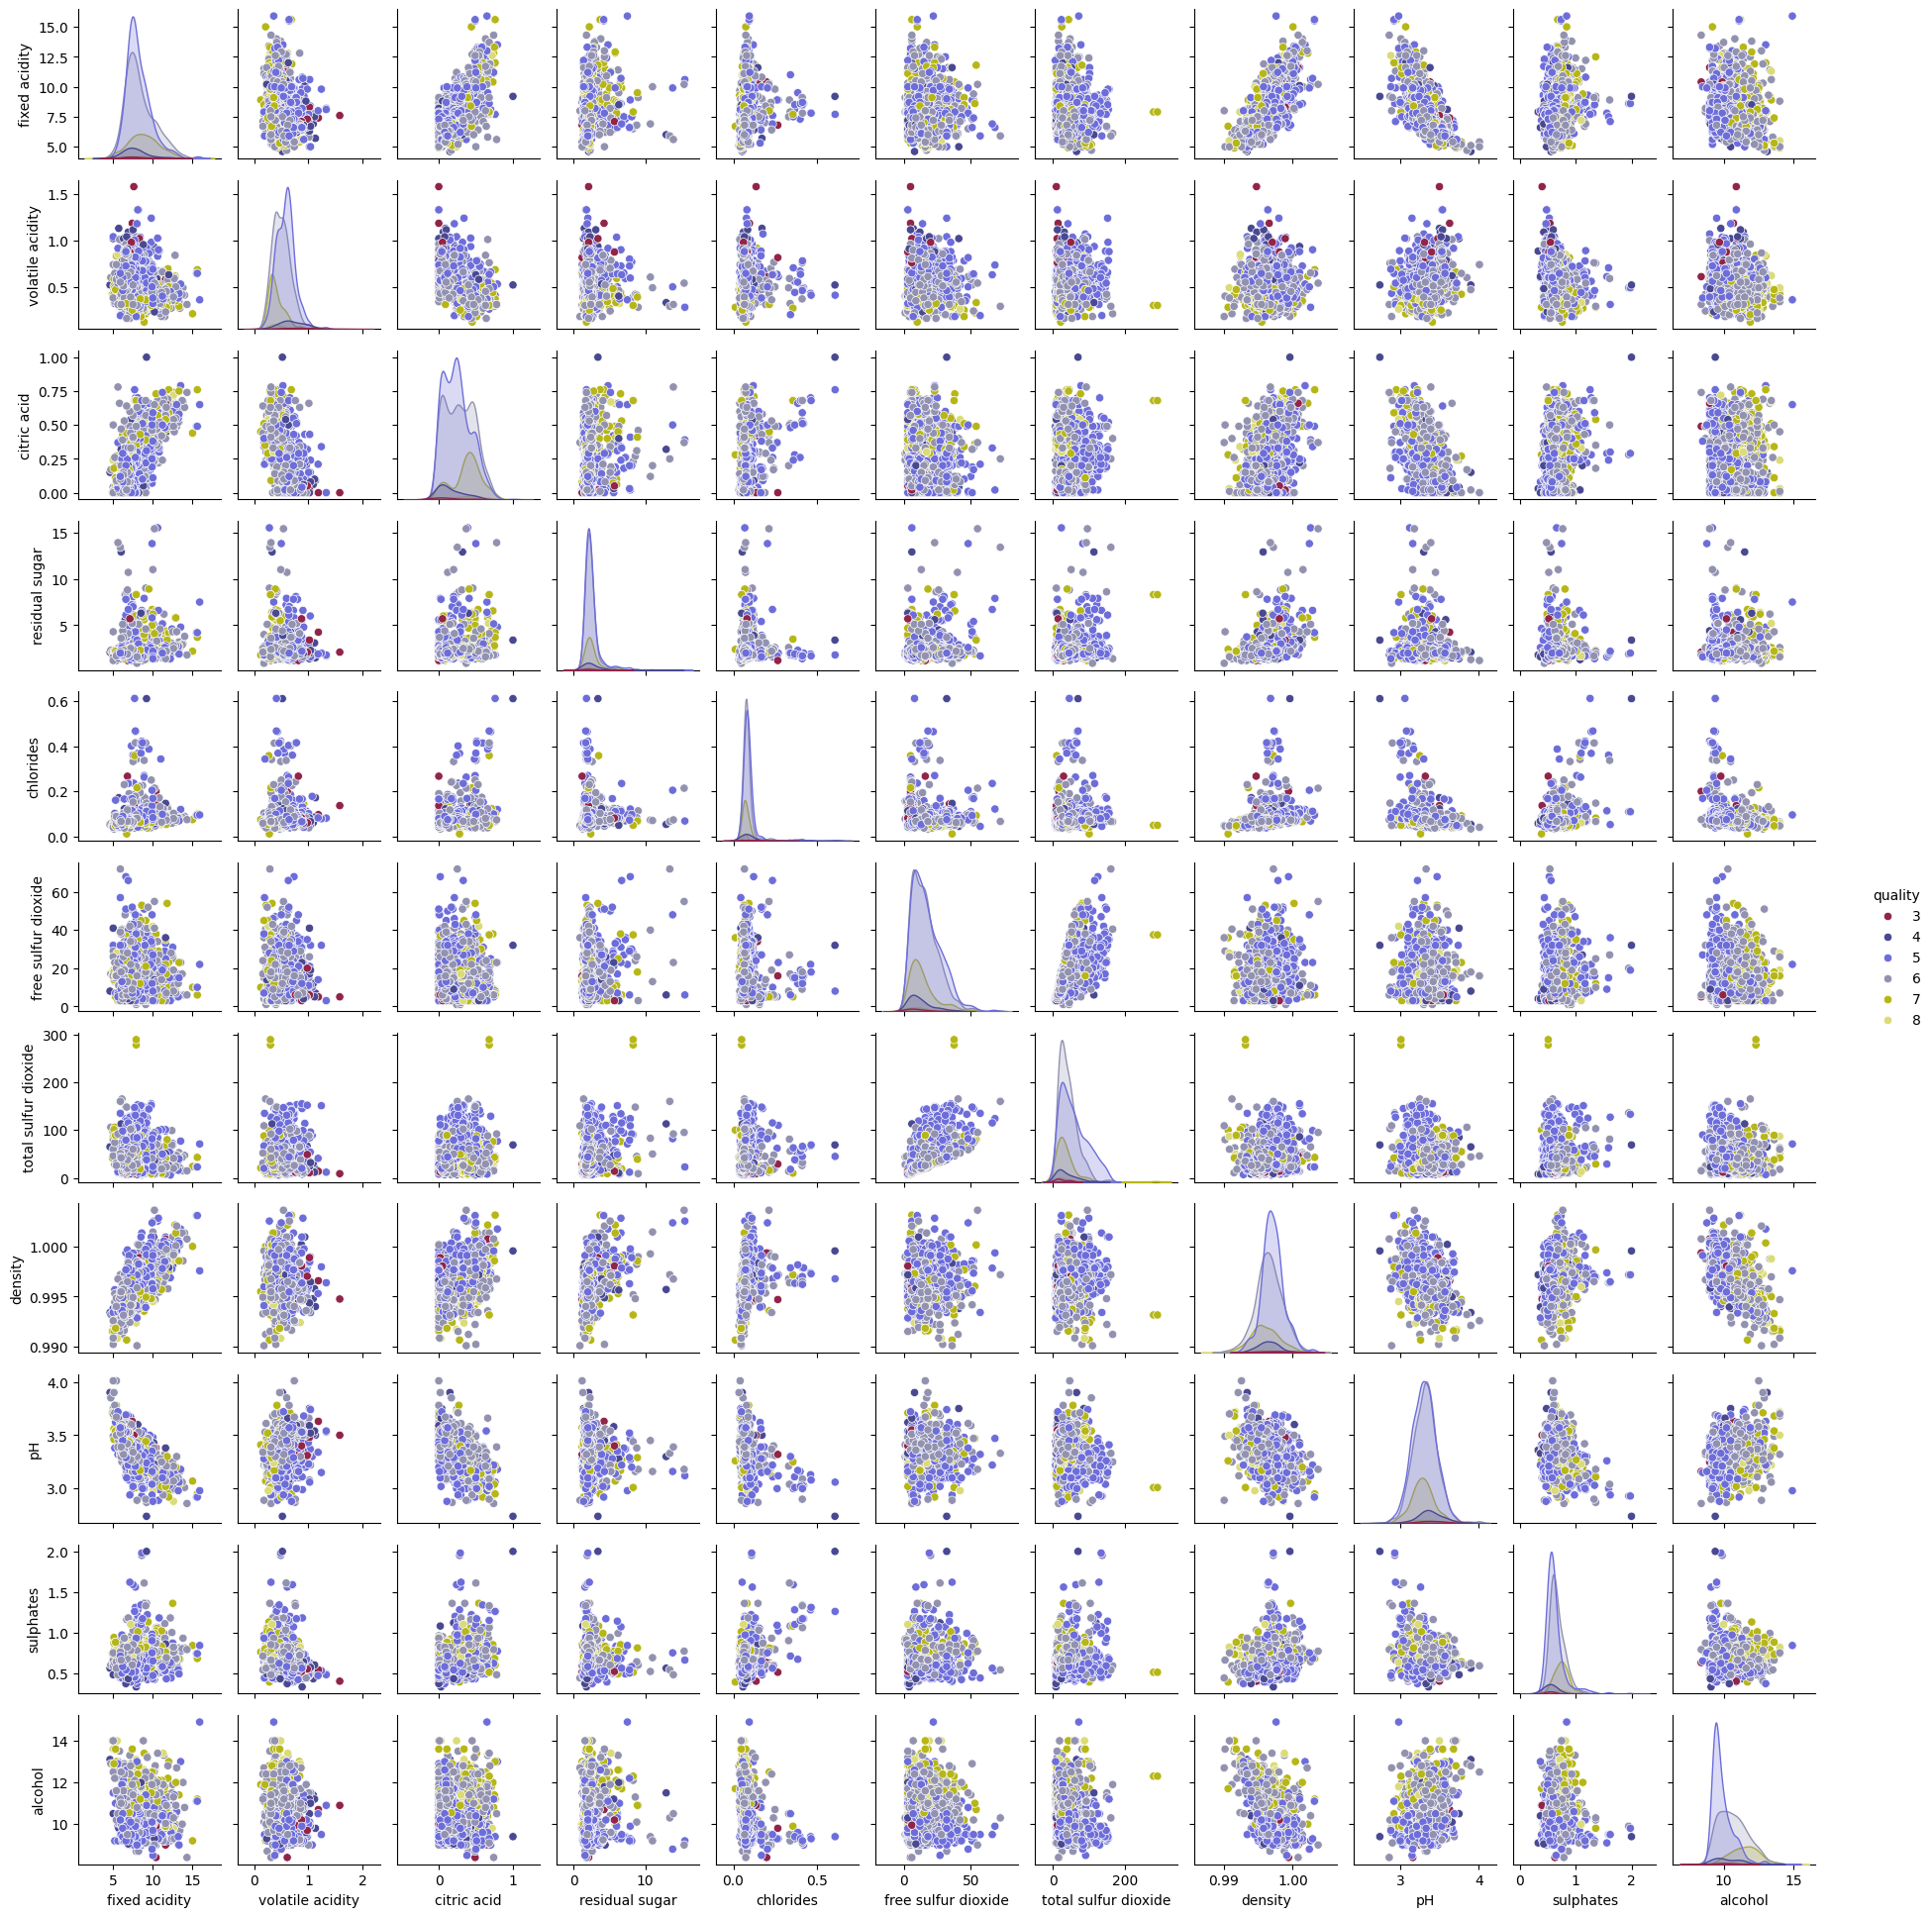

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
numeric_columns = get_numeric_columns(df)
palette = sns.color_palette("gist_stern", n_colors=6)
g = sns.pairplot(df[[*numeric_columns] + ["quality"]], hue='quality', height=1.2, diag_kind = 'kde', palette=palette)
g.figure.set_size_inches(20, 20)
plt.show()

Observamos que en algunas gráficas de dispersión existen patrones importantes

A continuación procedemos a aplicar el PCA

In [21]:
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler

predict_columns = [
    'fixed acidity',
    'volatile acidity',
    'citric acid',
    'residual sugar',
    'chlorides',
    'free sulfur dioxide',
    'total sulfur dioxide',
    'density',
    'pH',
    'sulphates',
    'alcohol'
]
X = df[[*predict_columns]]
preprocessor_scale = ColumnTransformer(
    transformers=[
        ("num", RobustScaler(), predict_columns),
    ],
    remainder="passthrough"
)


pca = Pipeline(steps=[
    ("preprocessor", preprocessor_scale),
    ("pca", PCA(n_components=10)),
])

X_pca = pca.fit_transform(X)

Gráficamos y observamos la variación acumulada

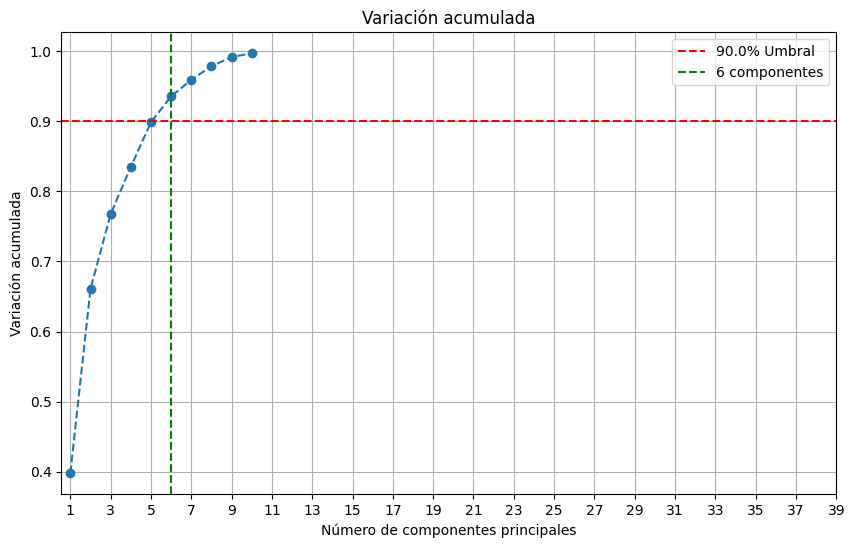

Variación acumulada:
Componente 1: 39.77%
Componente 2: 66.10%
Componente 3: 76.76%
Componente 4: 83.51%
Componente 5: 89.88%
Componente 6: 93.59%
Componente 7: 95.93%
Componente 8: 97.88%
Componente 9: 99.19%
Componente 10: 99.73%


In [22]:
explained_variance_cumulative = np.cumsum(pca.steps[-1][1].explained_variance_ratio_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), explained_variance_cumulative, marker='o', linestyle='--')
plt.title('Variación acumulada')
plt.xlabel('Número de componentes principales')
plt.ylabel('Variación acumulada')
plt.xticks(range(1, 41, 2))
plt.grid(True)


threshold = 0.90
optimal_components = np.argmax(explained_variance_cumulative >= threshold) + 1
plt.axhline(y=threshold, color='r', linestyle='--', label=f'{threshold * 100}% Umbral')
plt.axvline(x=optimal_components, color='g', linestyle='--', label=f'{optimal_components} componentes')

plt.legend()
plt.show()

print("Variación acumulada:")
for i, variance in enumerate(explained_variance_cumulative, 1):
    print(f"Componente {i}: {variance:.2%}")

Observamos grandes aumentos de la Variación para varios componentes.

Ahora lo observaremos por componente.

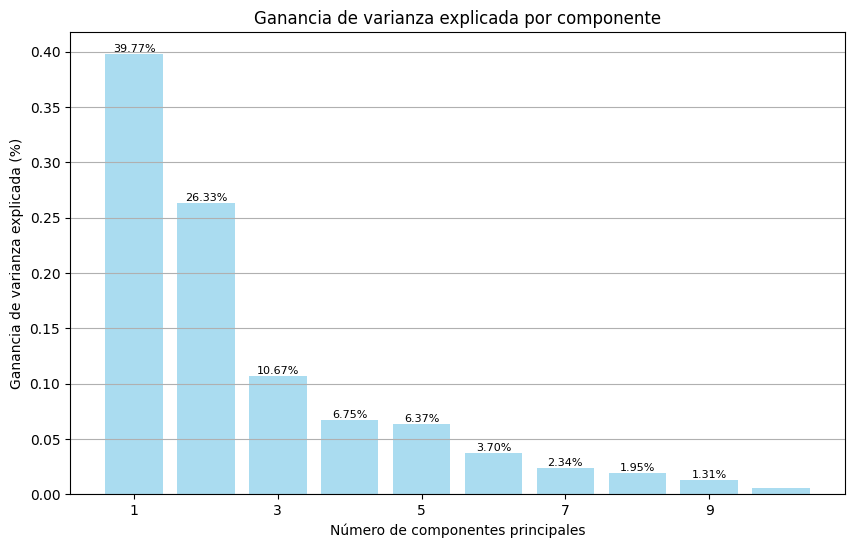

Ganancia de varianza explicada por componente:
Componente 1: 39.77%
Componente 2: 26.33%
Componente 3: 10.67%
Componente 4: 6.75%
Componente 5: 6.37%
Componente 6: 3.70%
Componente 7: 2.34%
Componente 8: 1.95%
Componente 9: 1.31%
Componente 10: 0.55%


In [23]:
explained_variance_gain = np.diff(explained_variance_cumulative, prepend=0)

# Graficar la ganancia de varianza explicada
plt.figure(figsize=(10, 6))
plt.bar(range(1, 11), explained_variance_gain, color='skyblue', alpha=0.7)
plt.title('Ganancia de varianza explicada por componente')
plt.xlabel('Número de componentes principales')
plt.ylabel('Ganancia de varianza explicada (%)')
plt.xticks(range(1, 11, 2))  # Mostrar solo cada dos componentes para claridad
plt.grid(axis='y')

# Resaltar las primeras componentes principales más significativas
threshold_gain = 0.01  # Umbral de ganancia significativa (1%)
significant_components = [i for i, gain in enumerate(explained_variance_gain, 1) if gain > threshold_gain]
for component in significant_components:
    plt.text(component, explained_variance_gain[component - 1], f"{explained_variance_gain[component - 1]:.2%}", 
             ha='center', va='bottom', fontsize=8, color='black')

plt.show()

# Mostrar las ganancias para cada componente
print("Ganancia de varianza explicada por componente:")
for i, gain in enumerate(explained_variance_gain, 1):
    print(f"Componente {i}: {gain:.2%}")

Ahora interpretaremos los componentes componentes principales

In [24]:
loadings = pd.DataFrame(
    pca.steps[-1][1].components_.T, 
    columns=[f'PC{i+1}' for i in range(pca.steps[-1][1].n_components_)],
    index=predict_columns
)


print("Coeficientes (loadings) de cada componente principal:")
print(loadings)


for i in range(pca.steps[-1][1].n_components_):
    most_influential = loadings[f'PC{i+1}'].abs().idxmax()
    print(f"La variable más influyente en PC{i+1} es: {most_influential}")

Coeficientes (loadings) de cada componente principal:
                           PC1       PC2       PC3       PC4       PC5  \
fixed acidity         0.063422  0.076812  0.589031  0.015747 -0.120725   
volatile acidity      0.004579 -0.011038 -0.267810  0.065691 -0.425108   
citric acid           0.069567  0.051026  0.315223  0.000085  0.164711   
residual sugar        0.097625  0.964392 -0.144167 -0.158595  0.030610   
chlorides             0.958739 -0.127238 -0.181345 -0.065999 -0.052595   
free sulfur dioxide   0.006036  0.075585 -0.144177  0.572910  0.232689   
total sulfur dioxide  0.026814  0.101880 -0.120538  0.699932  0.141277   
density               0.102996  0.161319  0.375210  0.180181 -0.376783   
pH                   -0.119467 -0.045513 -0.453069 -0.124496  0.040647   
sulphates             0.179193 -0.025882  0.210483  0.001269  0.624400   
alcohol              -0.068264  0.016618 -0.051111 -0.315961  0.407773   

                           PC6       PC7       PC8       

Se ha observado que utilizando solo los primeros 6 componentes, se puede conservar un poco más del 90% de la varianza acumulada. Con menos componentes, se mejora el tiempo y también aumenta la facilidad de visualización y análisis de datos.

Ahora Visualizaremos y compararemos los primeros 2 componentes principales.

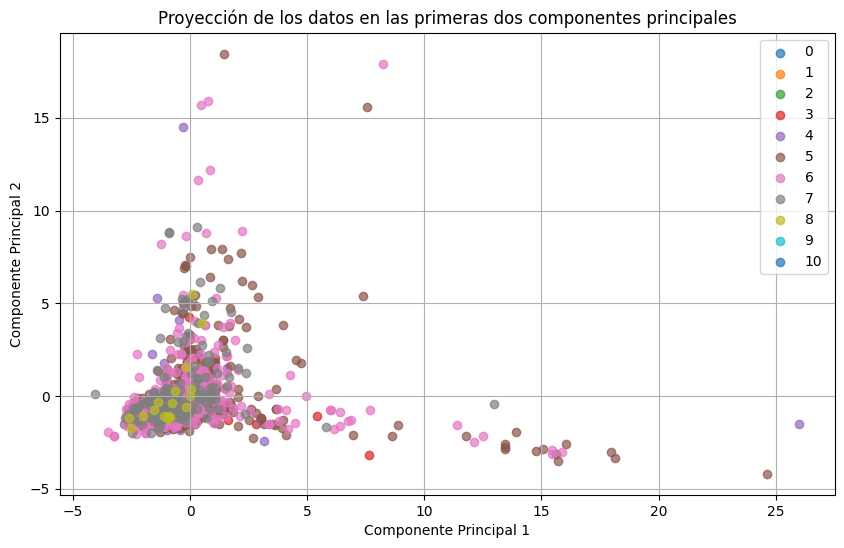

In [25]:
plt.figure(figsize=(10, 6))
for i in range(0, 11):
    subset = X_pca[df["quality"] == i][:, :2]
    plt.scatter(subset[:, 0], subset[:, 1], label=f'{i}', alpha=0.7)

plt.title('Proyección de los datos en las primeras dos componentes principales')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.grid(True)
plt.show()

### Resumen

Según lo observado en este EDA, el dataset se encuentra bastante limpio, encontramos 1 solo valor nulo, no encontramos duplicados ni outliers que deban ser eliminados.
En la observación inicial hemos encontrado que existen 5 variables importantes con mucha influencia sobre el resultado
Los demás campos pueden ser analizados con herramientas más robustas más adelante